In [1]:
!nvidia-smi

Thu Oct 16 06:29:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

# Change this path to your preferred Drive folder
DRIVE_OUTPUT_DIR = "/content/drive/MyDrive/yolo_outputs/physics_lab"
os.makedirs(DRIVE_OUTPUT_DIR, exist_ok=True)
print("YOLO outputs will be saved here:", DRIVE_OUTPUT_DIR)


YOLO outputs will be saved here: /content/drive/MyDrive/yolo_outputs/physics_lab


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.6/112.6 GB disk)


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

In [7]:
import os
import json
import cv2
from typing import List, Dict, Tuple
from google import genai
from google.genai import types

In [8]:
!ls

drive


In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WZ3OZfiYUcvT8zsgwg4D")
project = rf.workspace("team-rahman").project("physics_lab_apparatus-kzk1d")
version = project.version(7)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to physics_lab_apparatus-7 in yolov11:: 100%|██████████| 14434/14434 [00:01<00:00, 9123.55it/s] 


In [10]:
!ls {dataset.location}

!cat {dataset.location}/data.yaml

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 20
names: ['AC-Ammeter', 'Brass-Scale-Weights', 'Burette-Stand', 'DC-Ammeter', 'DC-Power-Supply', 'Deflection-Magnetometer', 'Deflection-Magnetometer-Power-supply', 'Helical-Extension-Spring', 'Lens', 'Meldes-Apparatus', 'Meldes-Apparatus-weight', 'Micrometer-Screw-Gauge', 'Multimeter', 'Pendulum-Clamp', 'Retort-Stand', 'Rubber-Mallet-Hammer', 'Spherometer', 'Stopwatch', 'Vernier-Caliper', 'Weight-carrier']

roboflow:
  workspace: team-rahman
  project: physics_lab_apparatus-kzk1d
  version: 7
  license: CC BY 4.0
  url: https://universe.roboflow.com/team-rahman/physics_lab_apparatus-kzk1d/dataset/7

In [11]:
!yolo task=detect mode=train model=yolov9s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

100% 14.7M/14.7M [00:00<00:00, 113MB/s] 
New https://pypi.org/project/ultralytics/8.3.214 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/physics_lab_apparatus-7/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch15880.jpg
confusion_matrix_normalized.png			   train_batch15881.jpg
confusion_matrix.png				   train_batch15882.jpg
events.out.tfevents.1759766500.81530451e0dc.499.0  train_batch1.jpg
F1_curve.png					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


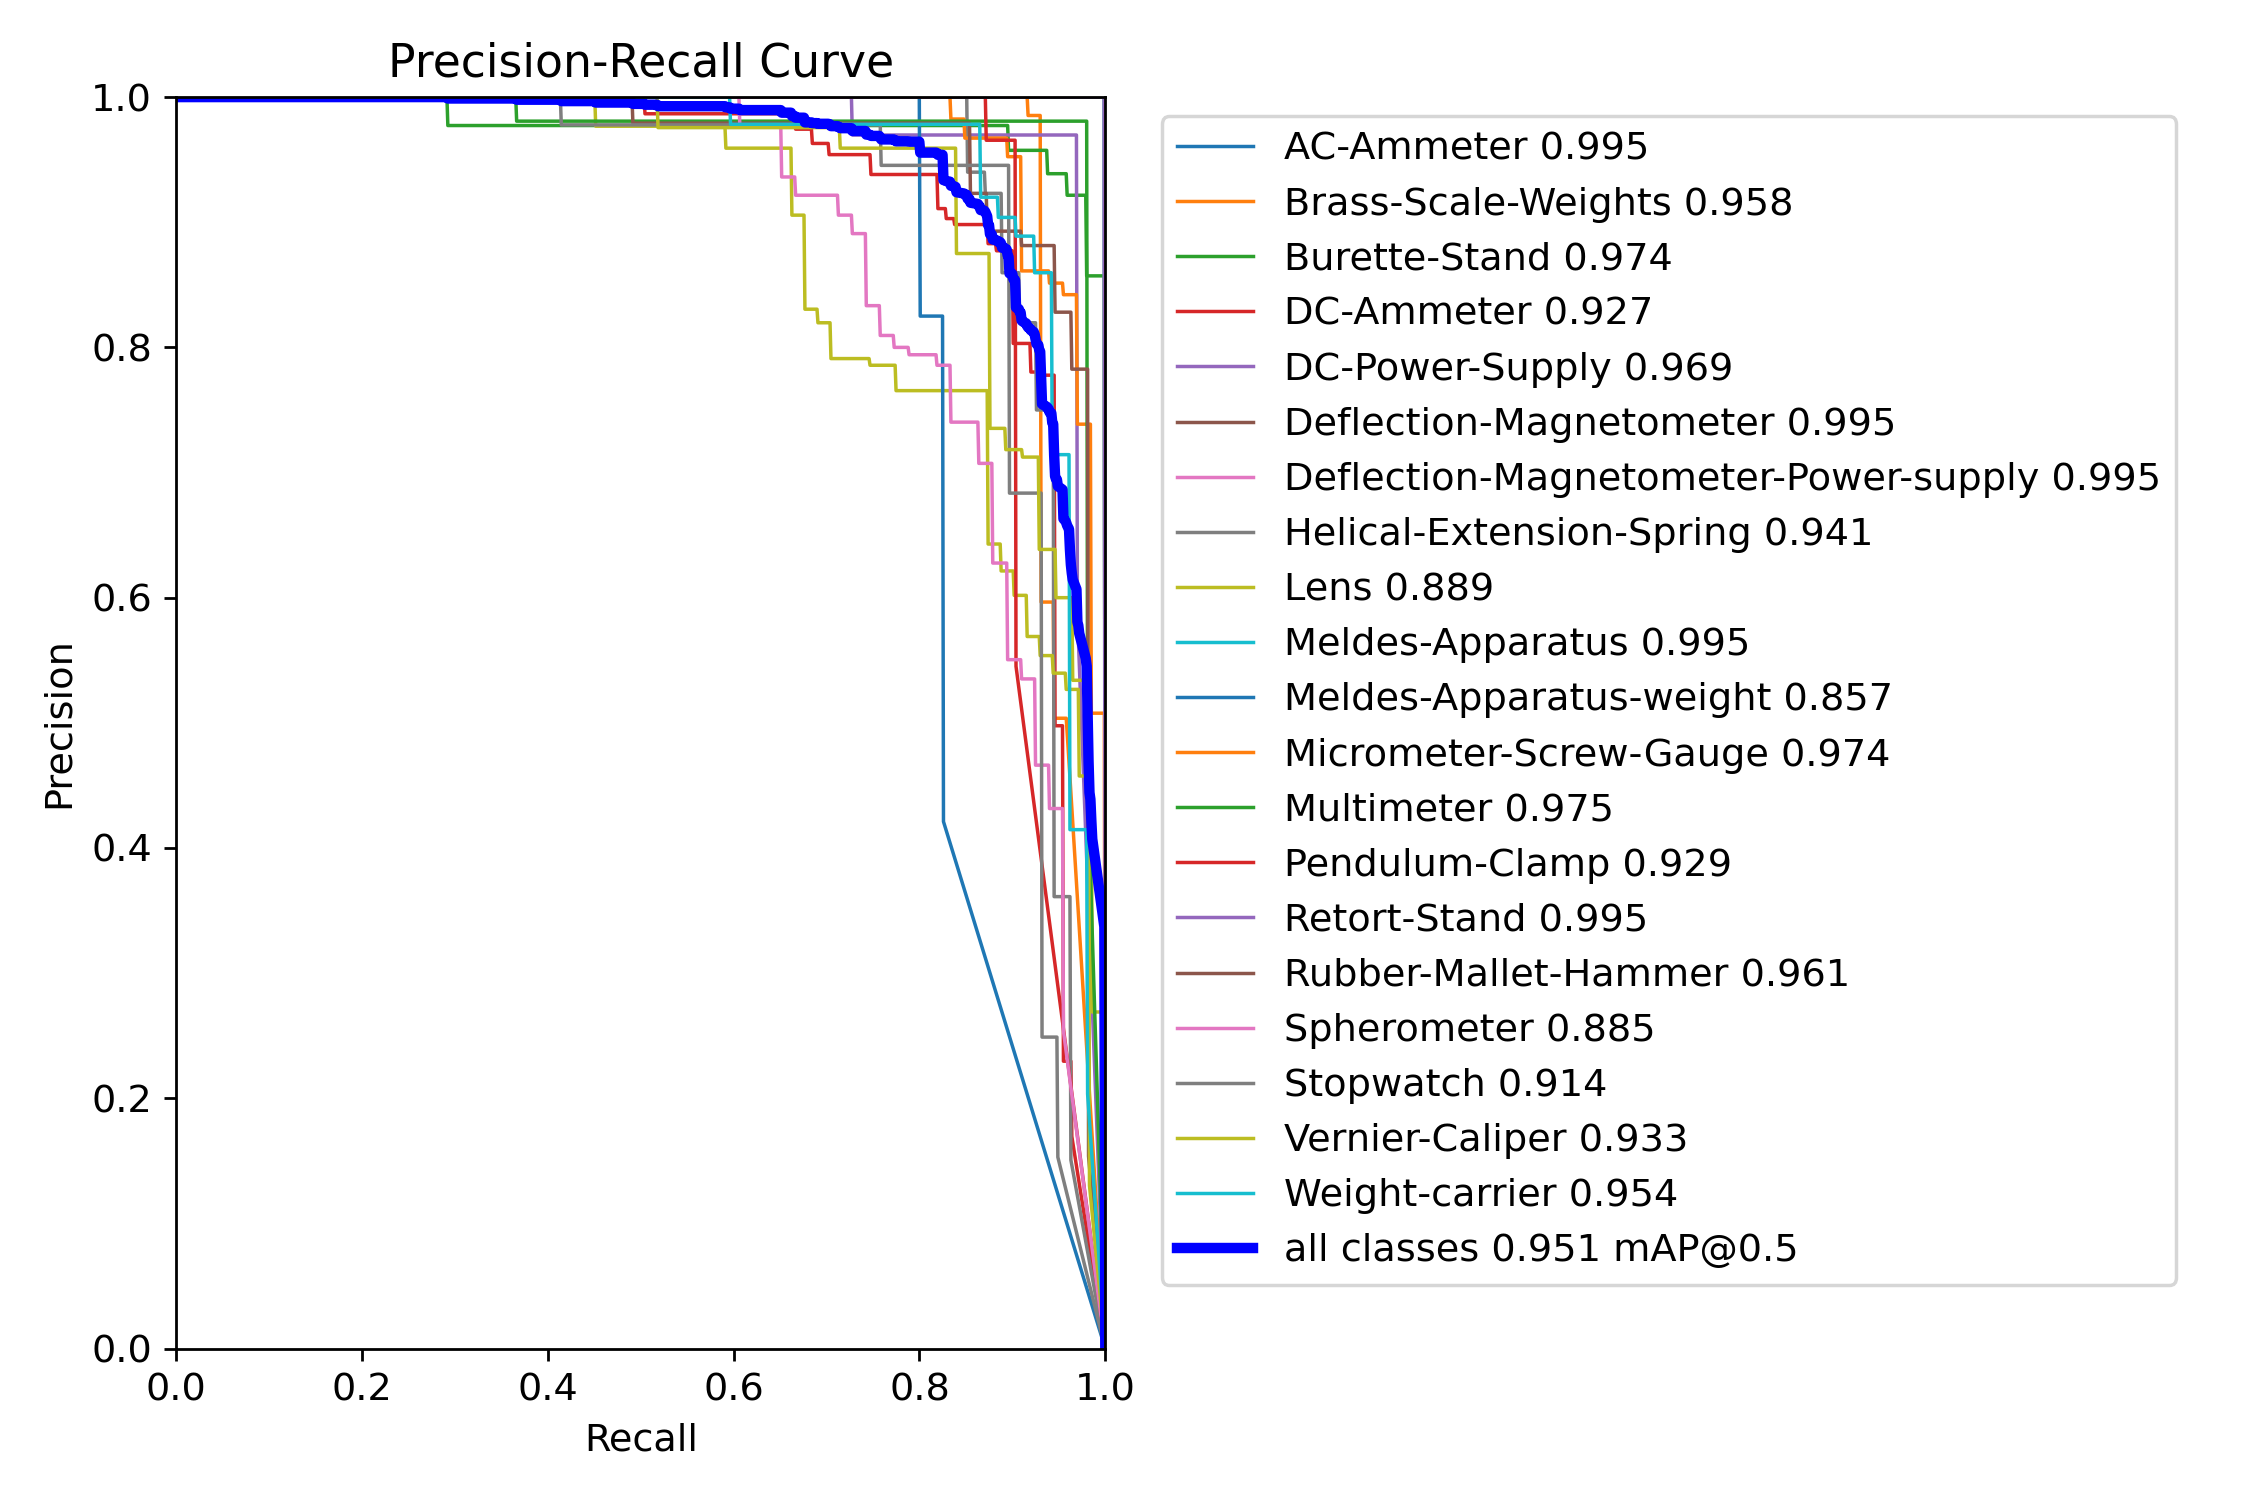

In [15]:
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

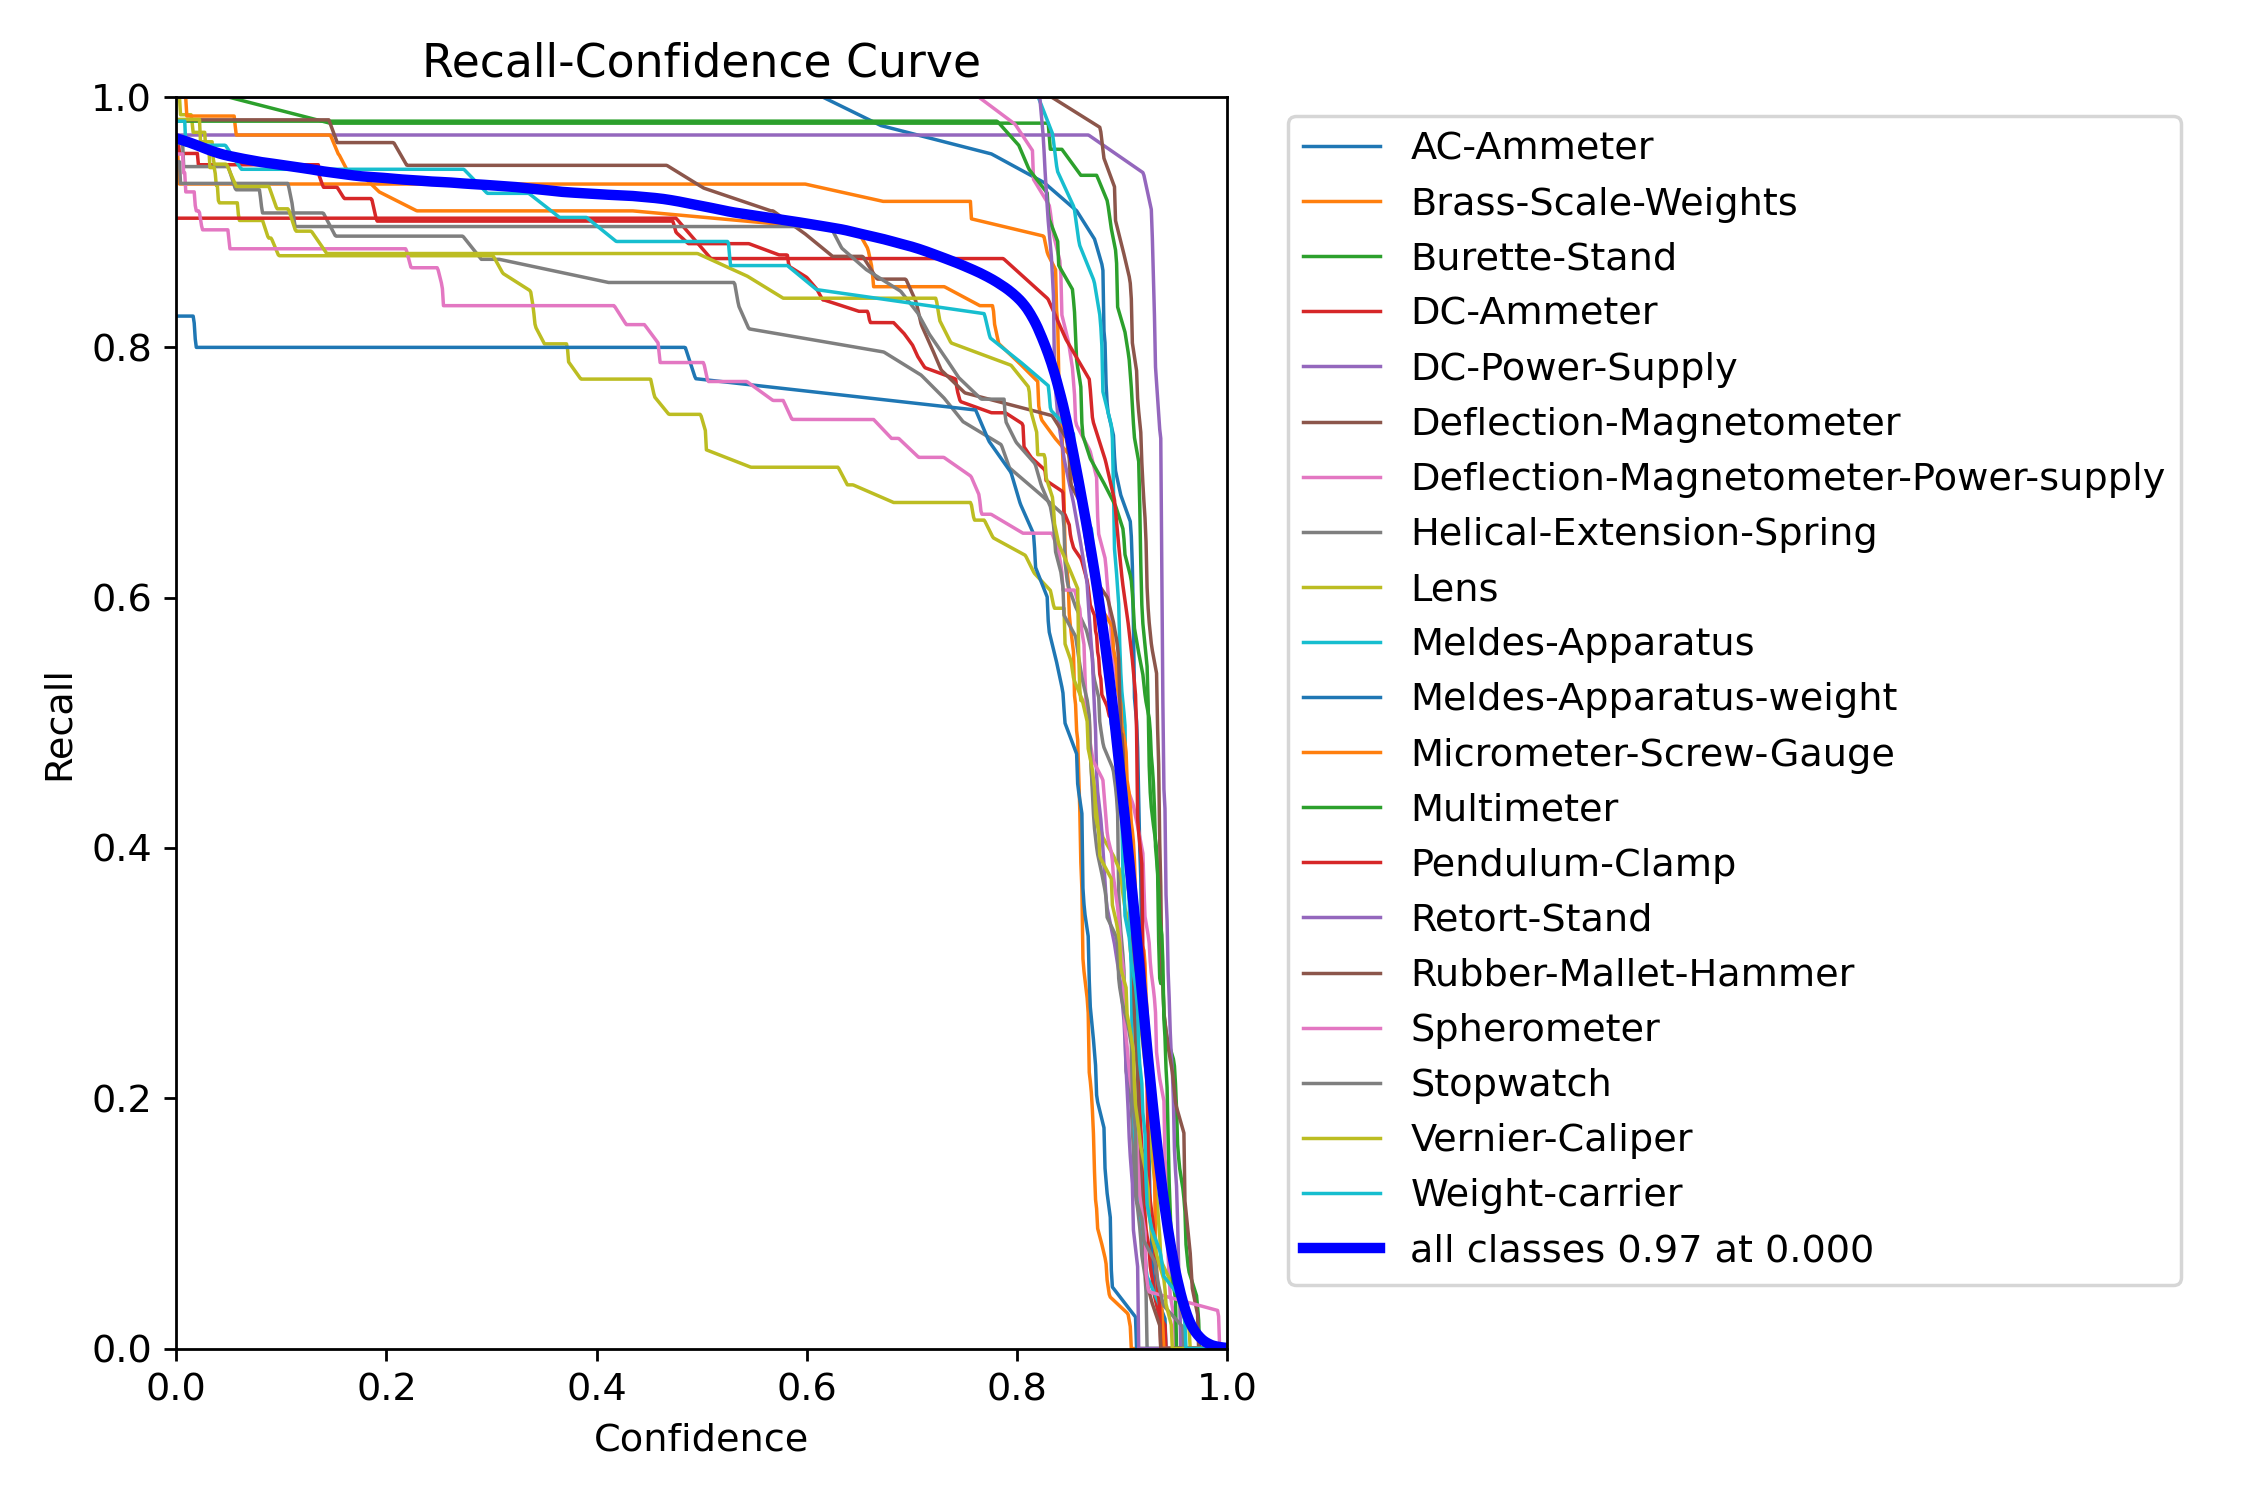

In [16]:
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

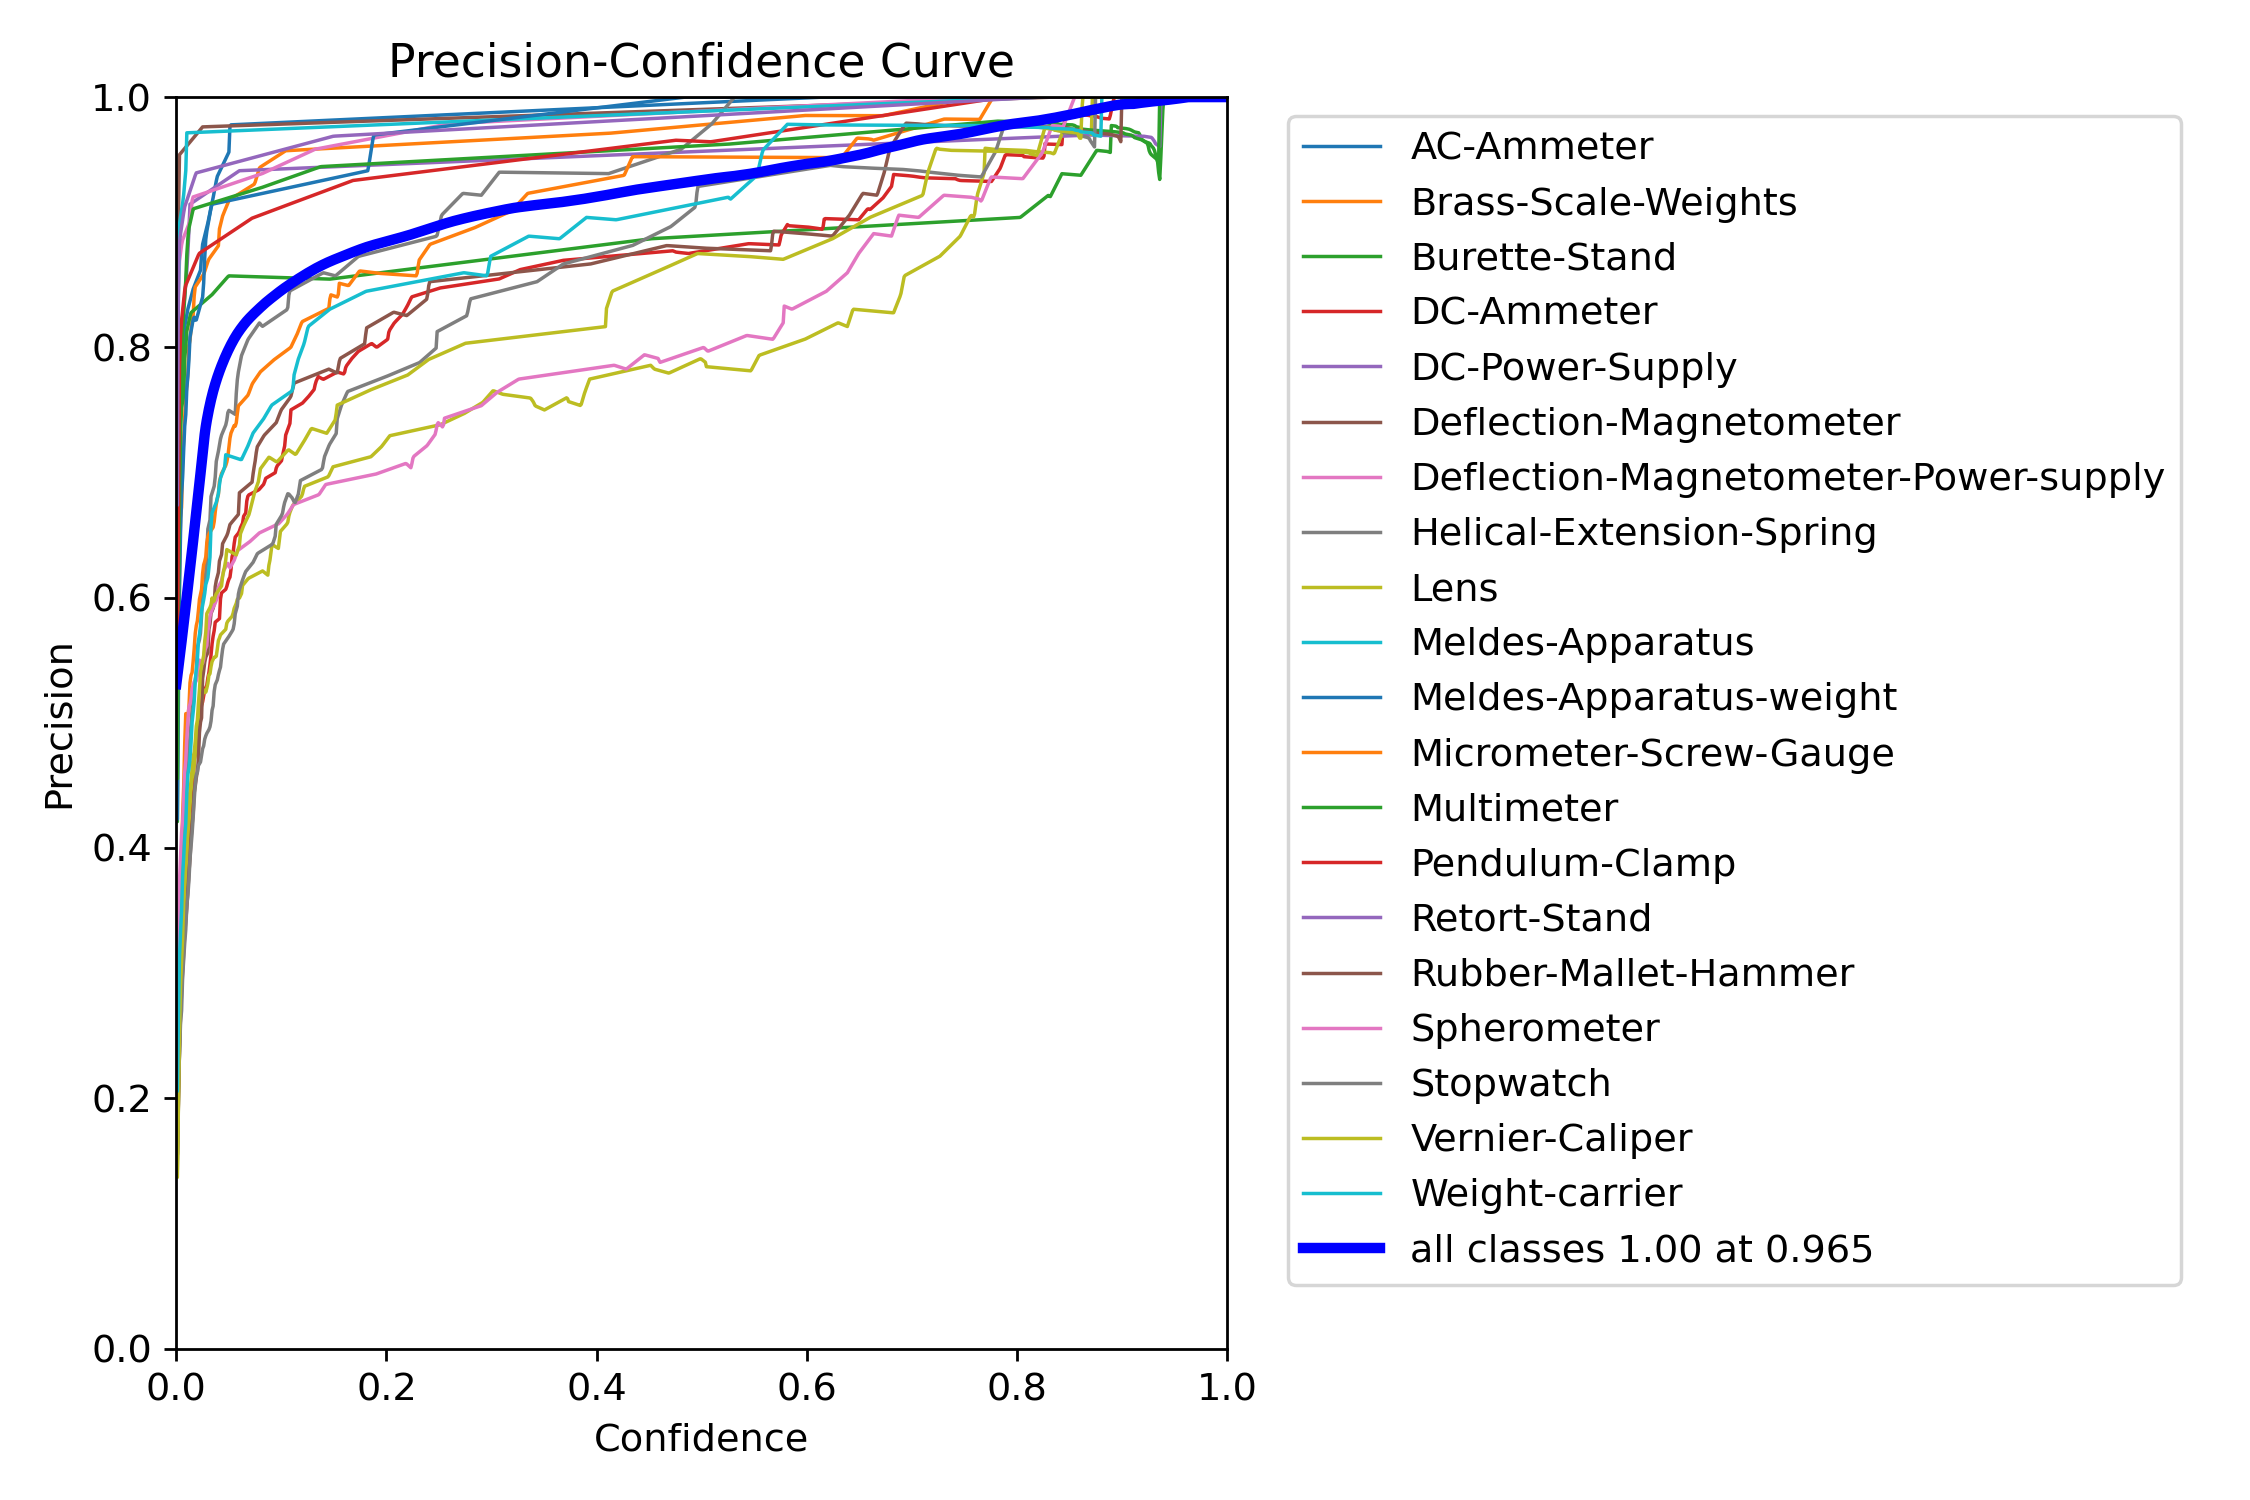

In [17]:
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

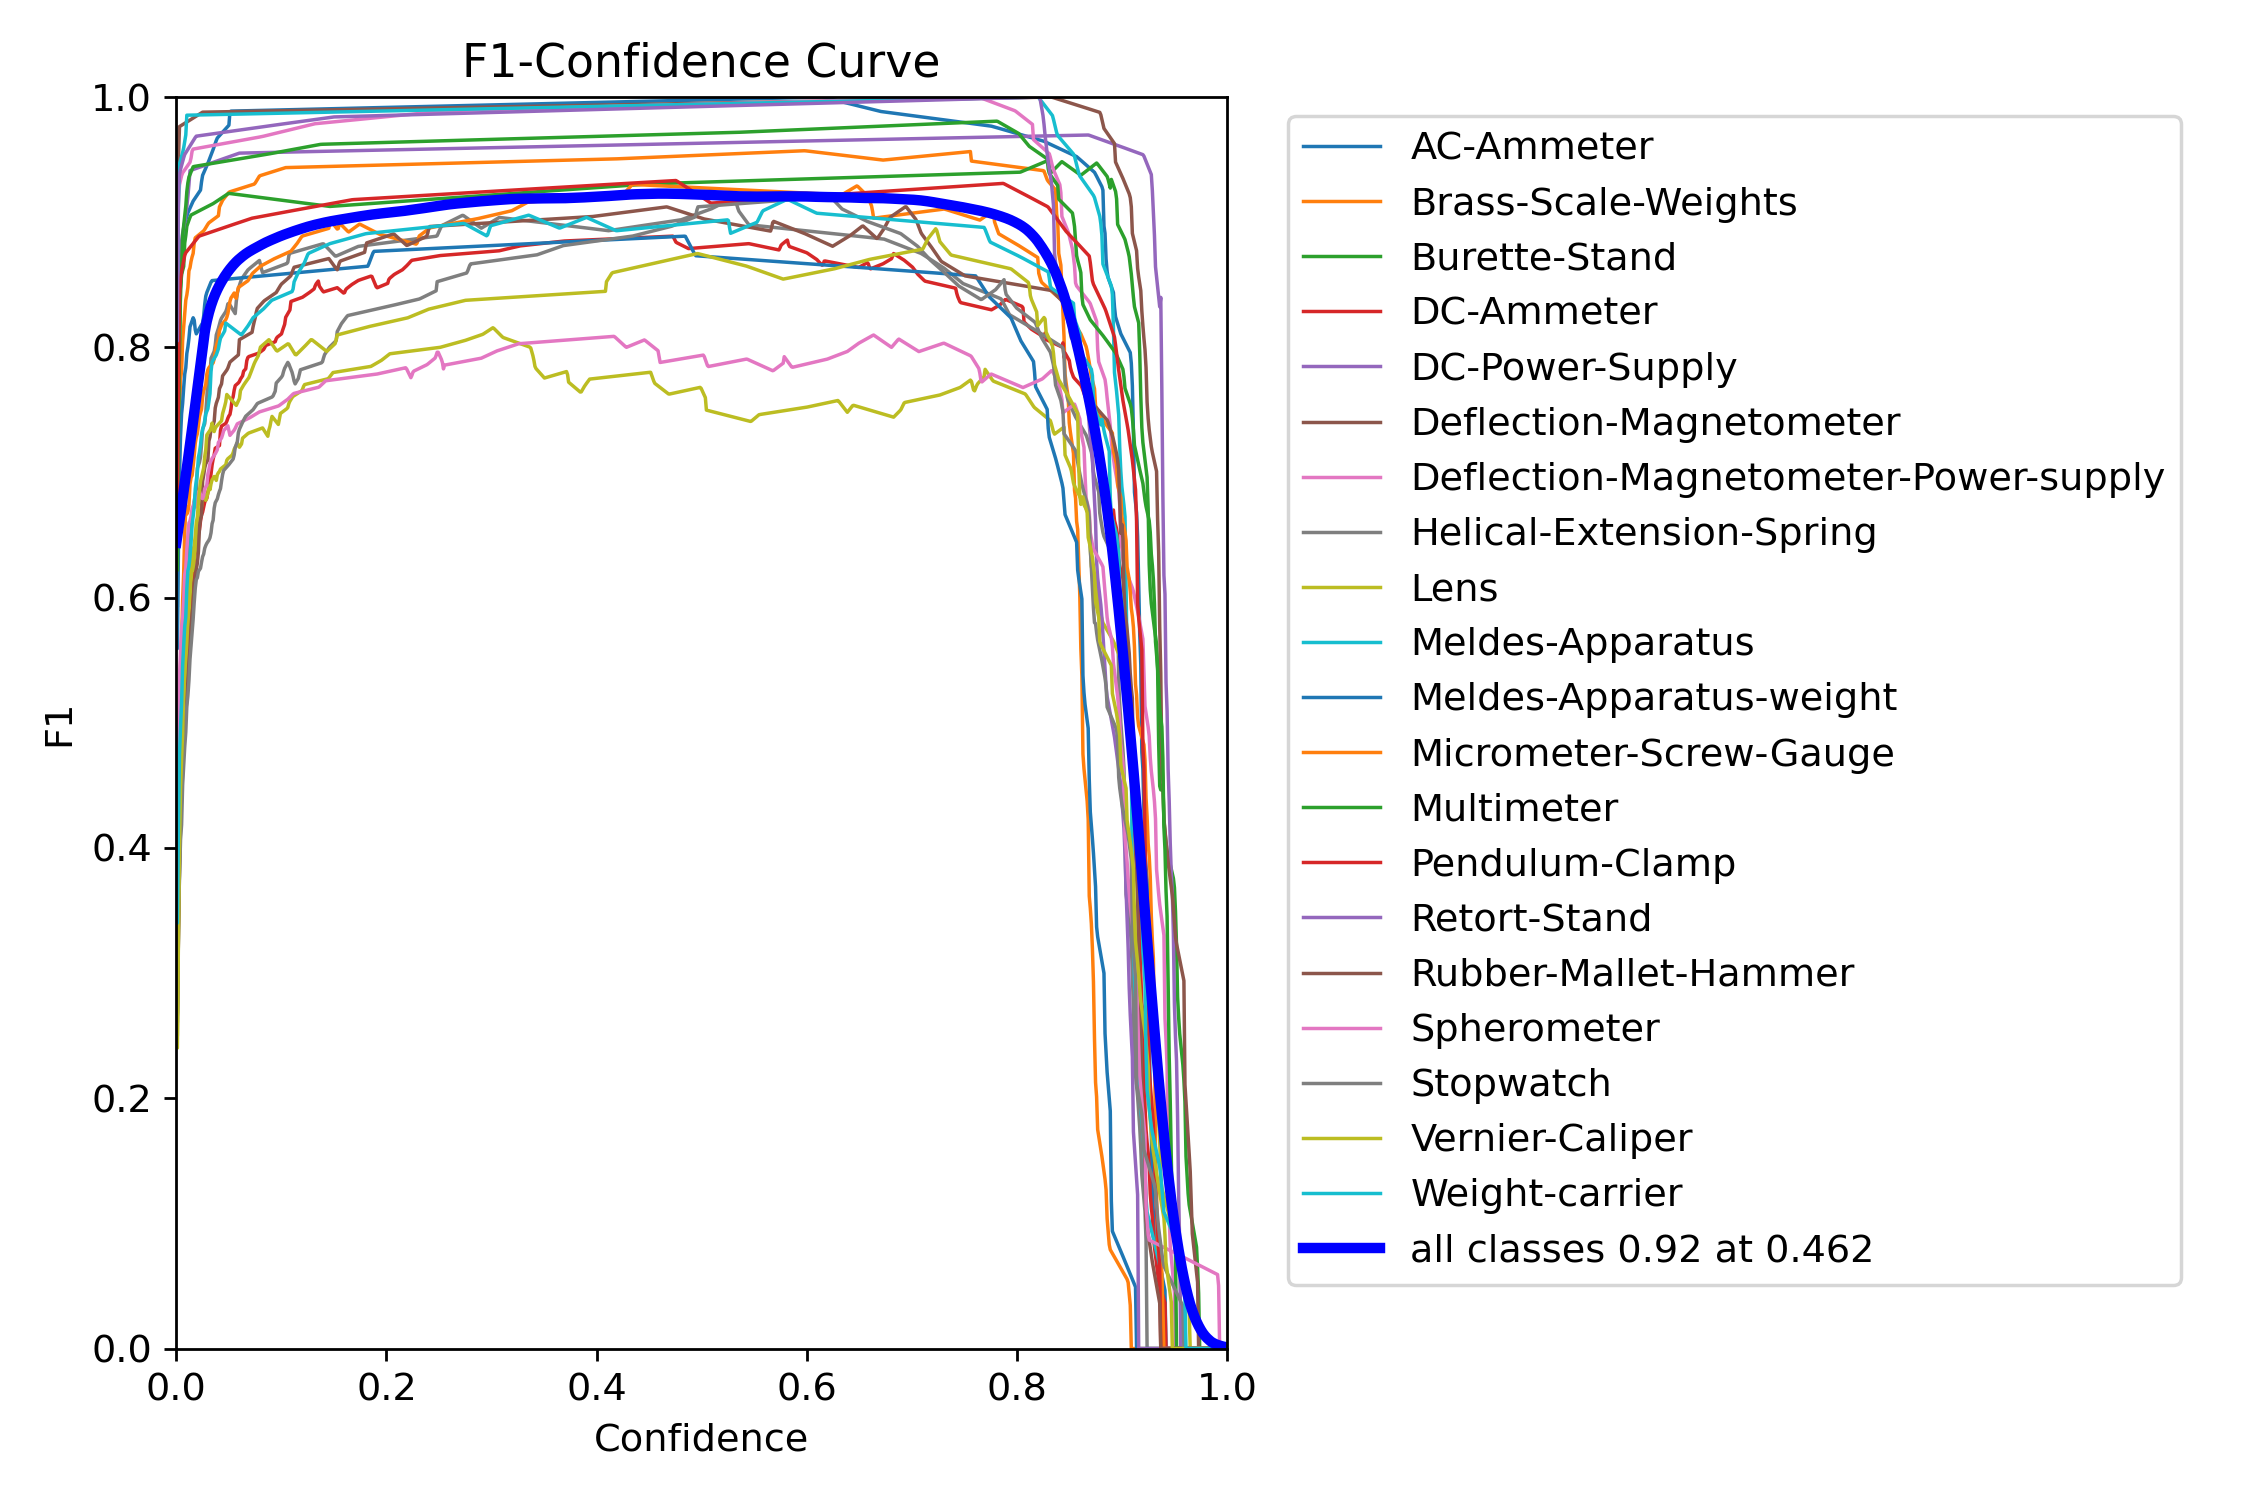

In [18]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

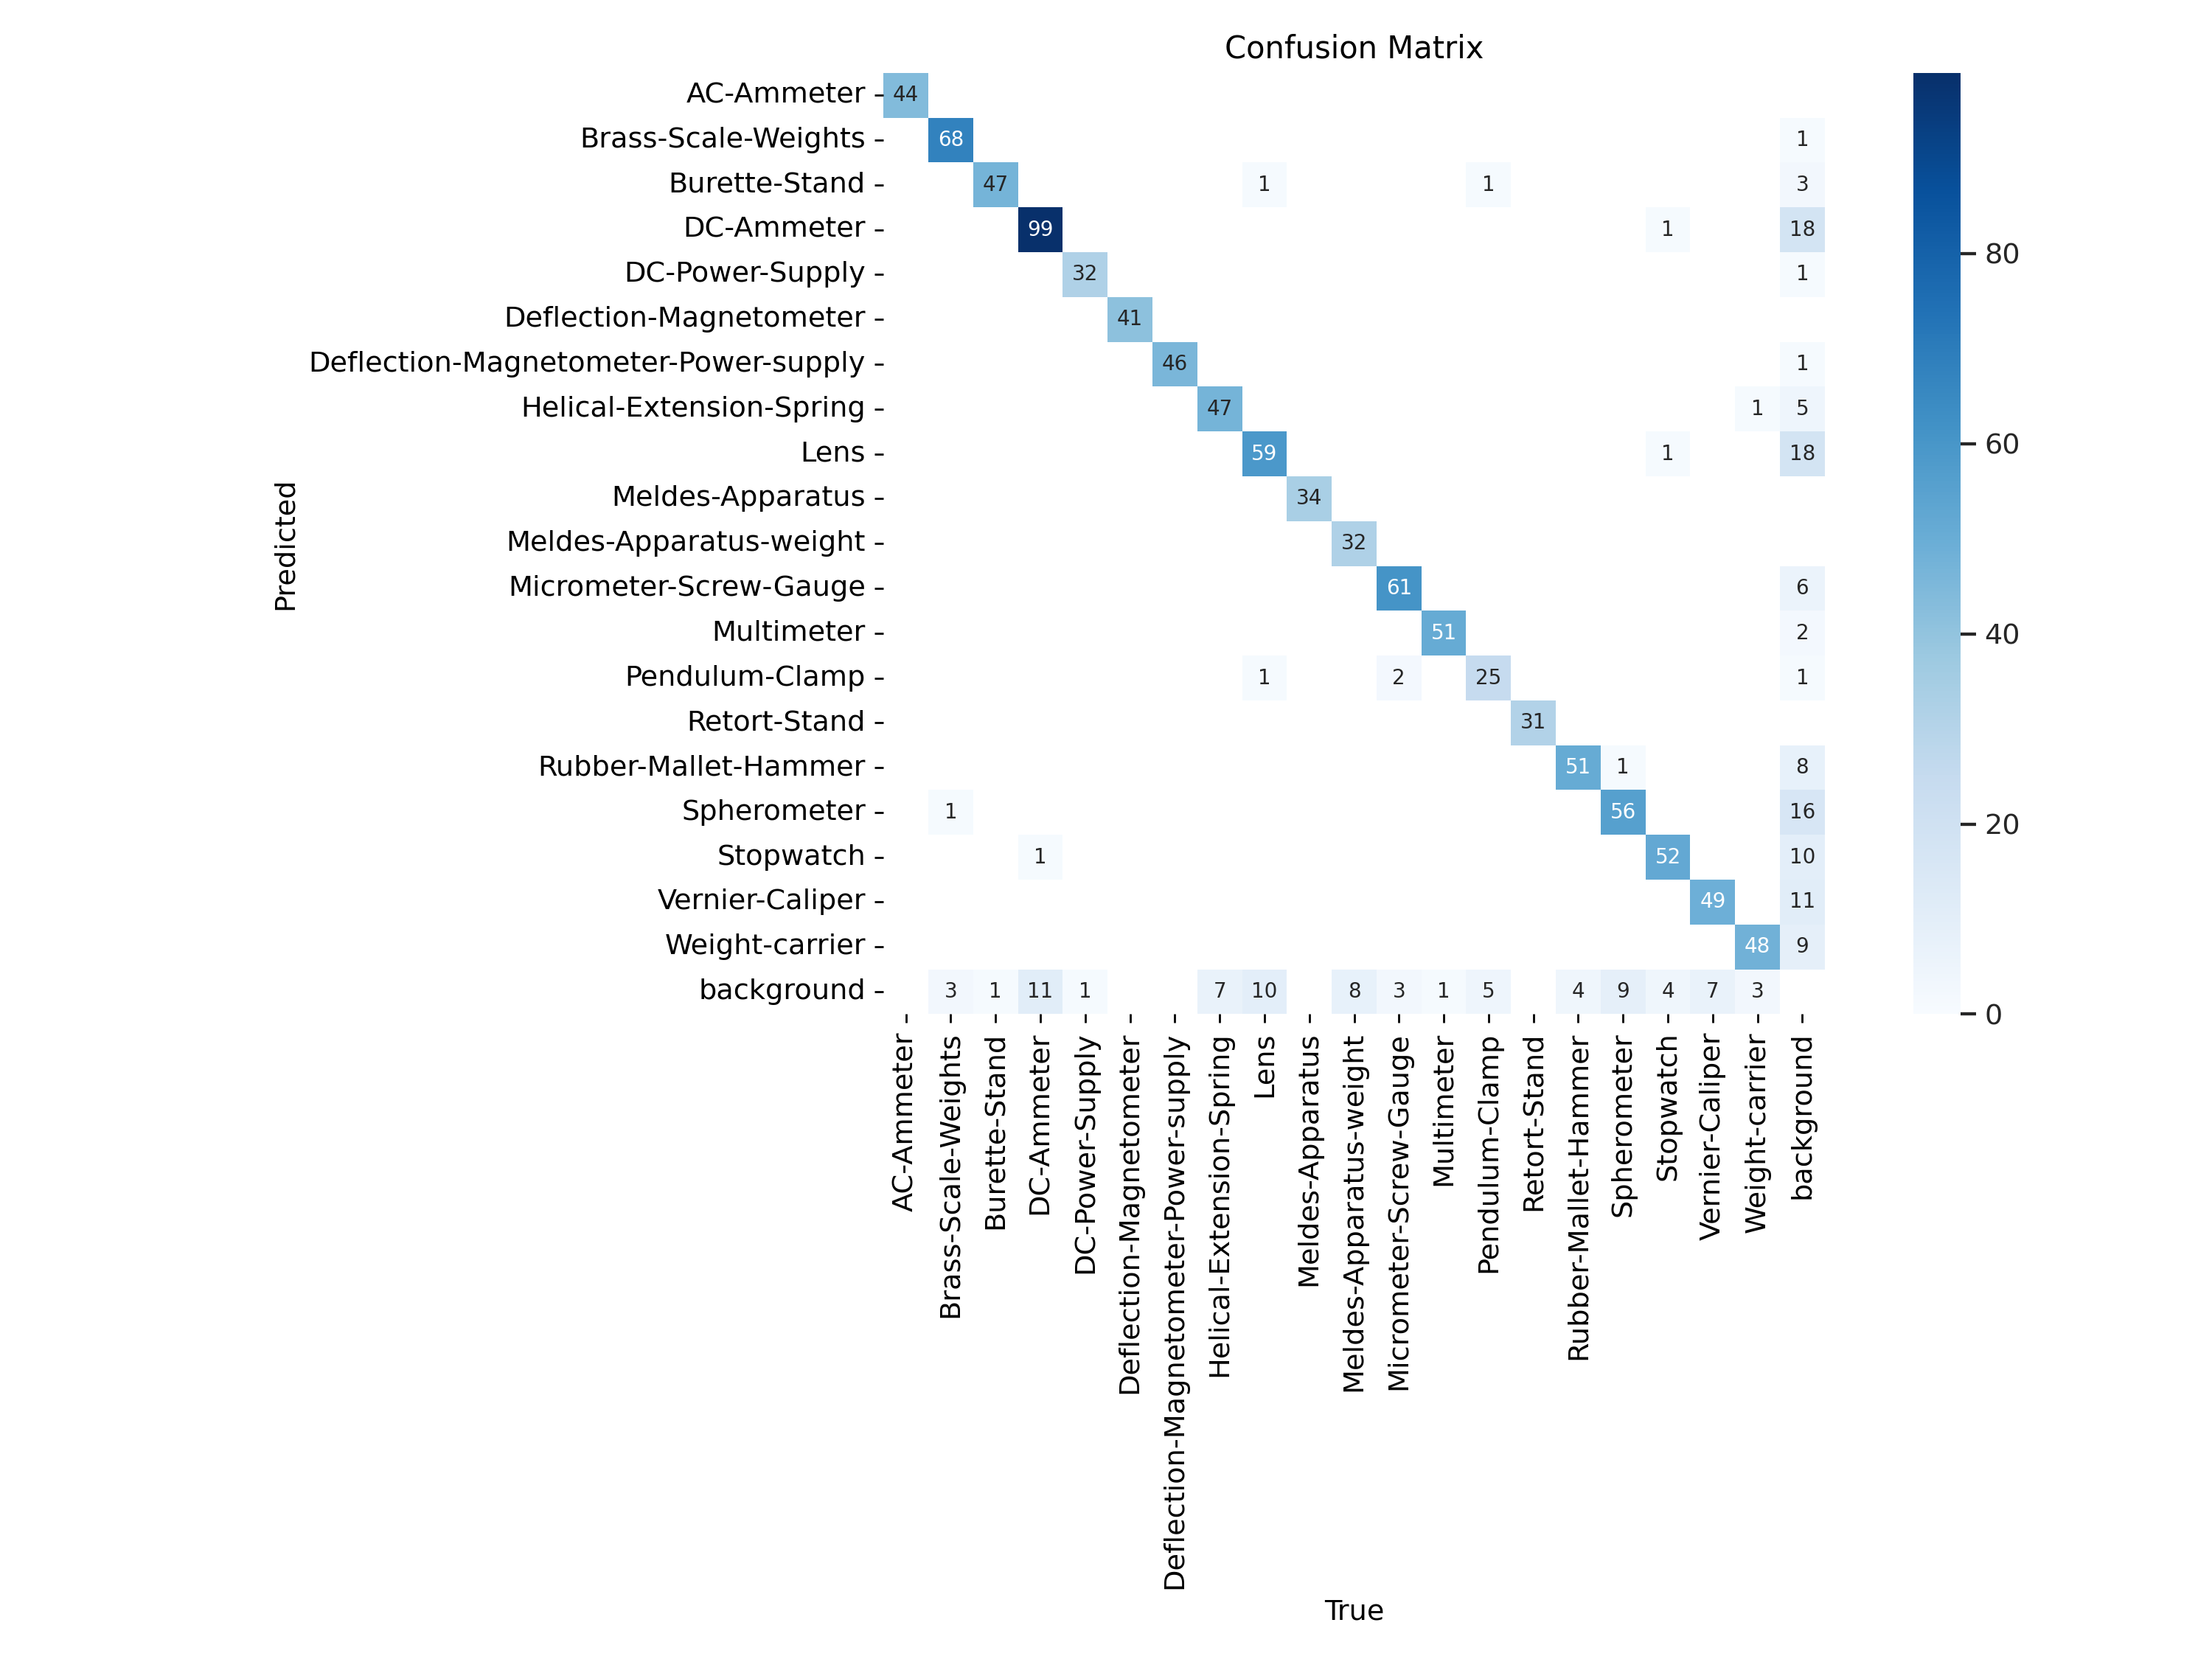

In [12]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

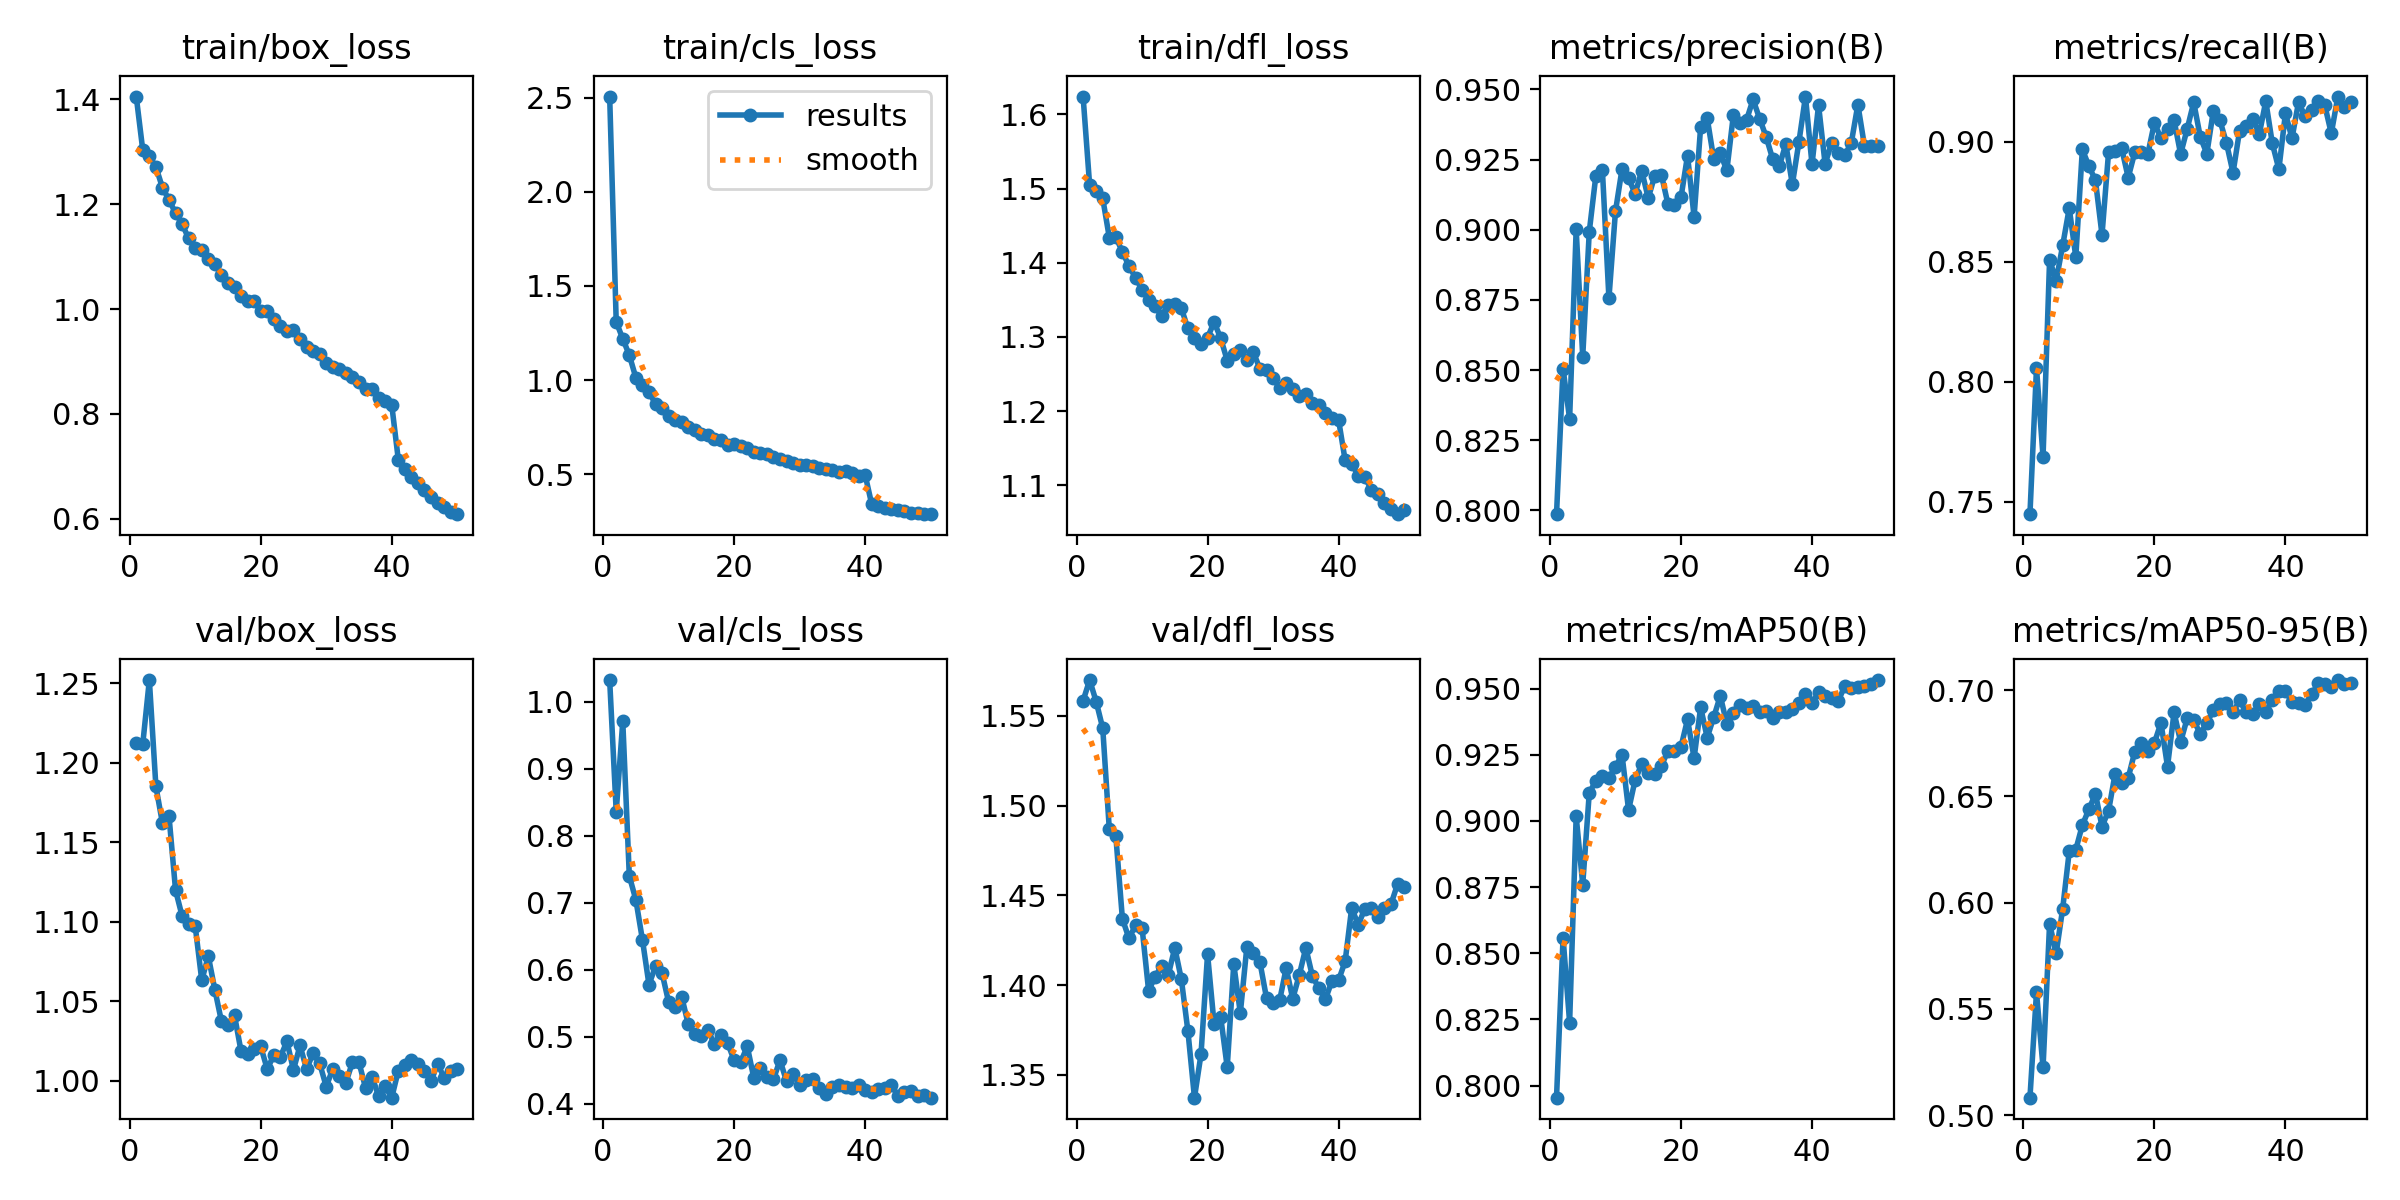

In [13]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

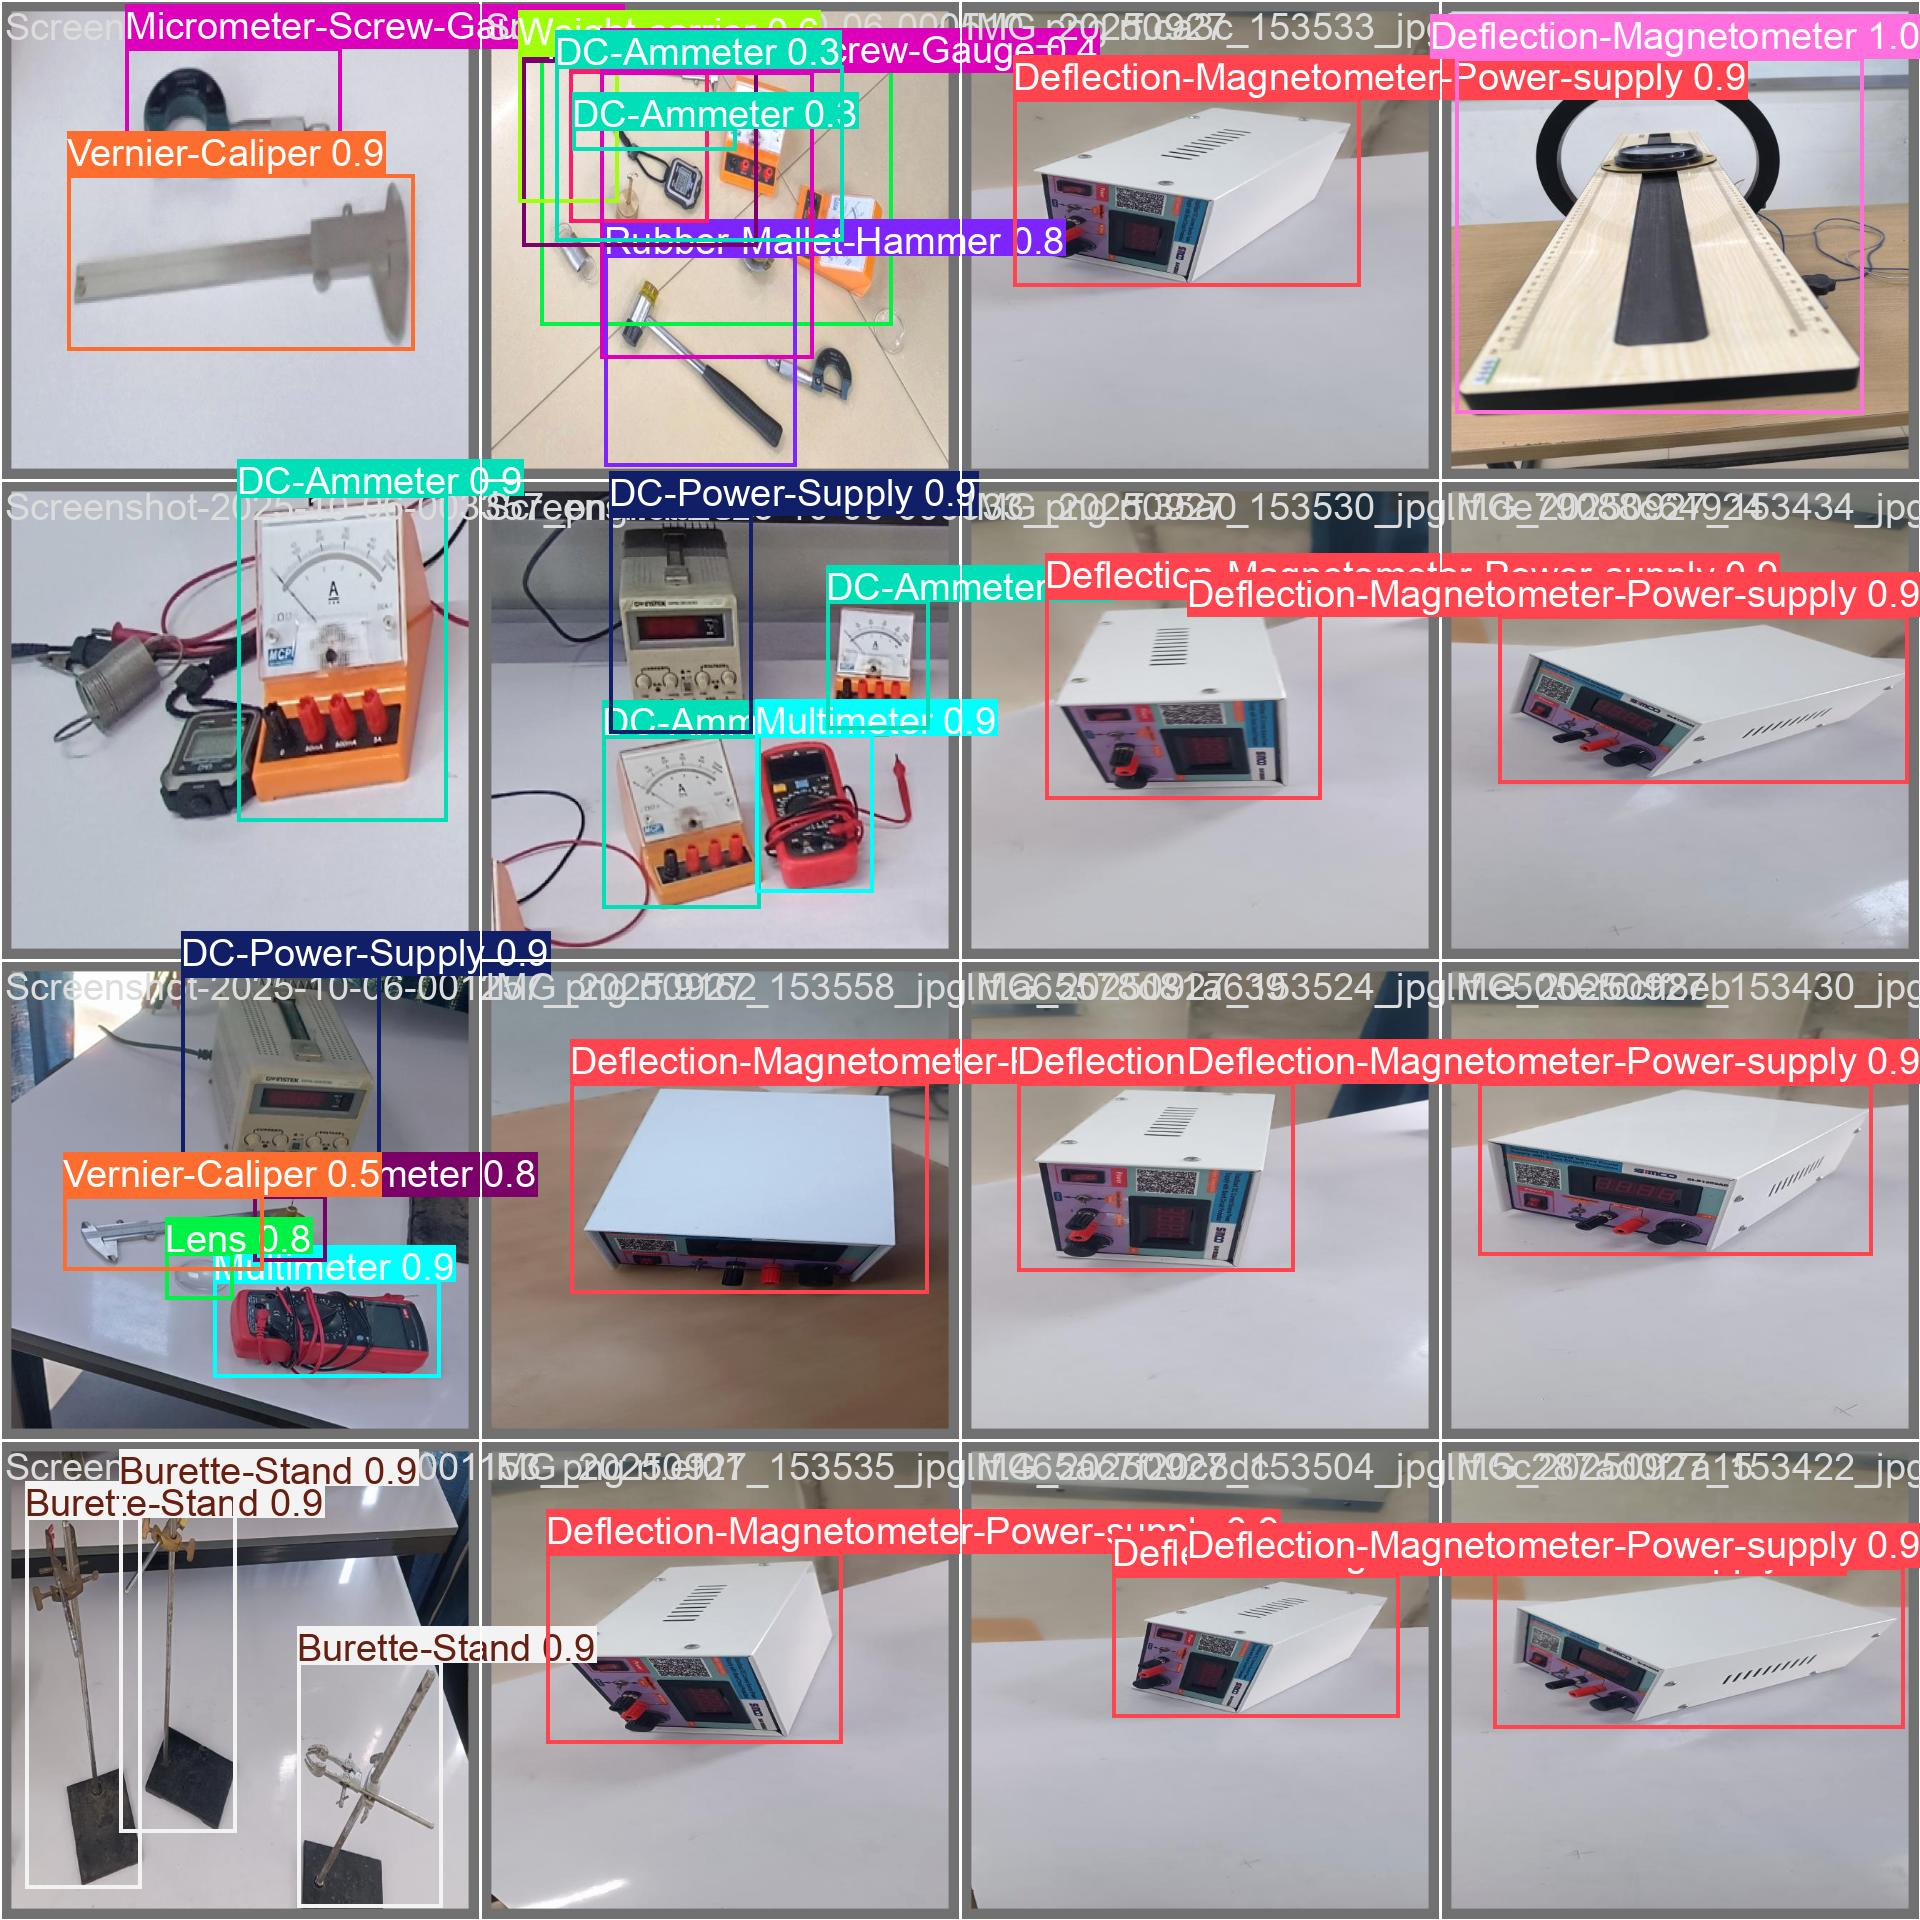

In [14]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [19]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,174,828 parameters, 0 gradients, 26.8 GFLOPs
val: Scanning /content/physics_lab_apparatus-7/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100% 612/612 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 127, len(boxes) = 1061. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 39/39 [00:10<00:00,  3.89it/s]
                   all        612       1061      0.929      0.918      0.951      0.704
            AC-Ammeter         44         44      0.994          1      0.995      0.766
   Brass-Scale-Weights         24         72      0.975      0.931      0.958      0.664
         Burette-Stand         

In [20]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,174,828 parameters, 0 gradients, 26.8 GFLOPs

image 1/302 /content/physics_lab_apparatus-7/test/images/IMG_20250925_142402_jpg.rf.e932f0b29cadfecdd13b2b1d5ae8975b.jpg: 640x640 1 DC-Ammeter, 1 Lens, 1 Spherometer, 1 Vernier-Caliper, 20.2ms
image 2/302 /content/physics_lab_apparatus-7/test/images/IMG_20250925_142517_jpg.rf.55c3f278e100bcacd7681674a15cdbc9.jpg: 640x640 1 DC-Power-Supply, 20.3ms
image 3/302 /content/physics_lab_apparatus-7/test/images/IMG_20250925_142615_jpg.rf.d3559256d867f661c8044861cdc17fe9.jpg: 640x640 1 DC-Power-Supply, 1 Spherometer, 1 Vernier-Caliper, 20.3ms
image 4/302 /content/physics_lab_apparatus-7/test/images/IMG_20250925_142721_jpg.rf.f72146e089117d6428d7d38879b1812f.jpg: 640x640 3 Burette-Stands, 1 DC-Power-Supply, 1 Lens, 1 Spherometer, 1 Vernier-Caliper, 20.2ms
image 5/302 /content/physics_lab_apparatus-7/test/images/IMG_20250925_142756_j